<a href="https://colab.research.google.com/github/ahmeddsoffar/photo-segmentation/blob/main/day_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U torch  ultralytics ## da el 48al fe yolo
import torch  ## zy tenserflow
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available()) ## da b4oof lw fe gpu wla la2
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!mkdir images ## make direct folder gdeed
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg ## btgeeb 7aga mn el web we b7otha fe el folder el ana 3eazo
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth ## b5od  mno version mo3yna
!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8s.pt ## b5od  yolo v8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.w

In [2]:
from ultralytics import YOLO
import numpy as np
import cv2
import torch
from segment_anything import sam_model_registry,SamPredictor
import matplotlib.pyplot as plt

In [29]:
model= YOLO('/content/yolov8s.pt')

def yolov8_detection(model,image):
  reuslts=model(image,stream=True) ## GEN Reuslts of objects
  for result in reuslts:
    boxes=result.boxes # boxes object 34an el bbox outputs ## kol box 77to fe
    print(boxes)
  bbox=boxes.xyxy.tolist()[4]  ## change this to highlight diff objects in any photo
  return bbox

In [32]:
image=cv2.imread('/content/pexels-gerardo-martinez-499452651-27307368.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)




In [33]:
sys.path.append("..") ## by2ol ana w2eef 3leeha dlw2t
sam_checkpoint= "sam_vit_h_4b8939.pth" ## da asm file 3ndna
model_type="vit_h" ##model type or architecture being referenced is a Vision Transformer
device="cuda"
sam=sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor=SamPredictor(sam)
predictor.set_image(image)


sam=sam_model_registry[model_type](checkpoint=sam_checkpoint):
This line creates a sam model by looking it up in the sam_model_registry using the model_type key.
It initializes the model with weights from the sam_checkpoint file.

sam.to(device=device):
This line moves the sam model to a specified device (like a GPU or CPU) for computation, as indicated by the device variable.



predictor=SamPredictor(sam):
This creates a SamPredictor object using the sam model. The predictor will use the model to make predictions.



predictor.set_image(image):
This sets an image for the SamPredictor to work on. The model will use this image to generate predictions.


In [34]:
def show_mask(mask,ax,random_color=False):
  if random_color:
    color=np.concatenate([np.random.random(3),np.array([0.6])],axis=0)
  else:
    color=np.array([30/255,144/255,255/255,0.6])
  h,w=mask.shape[-2:]
  mask_image=mask.reshape(h,w,1)*color.reshape(1,1,-1)
  ax.imshow(mask_image)


In [35]:
def show_points(coords,labels,ax,marker_size=375):
  pos_points=coords[labels==1]
  neg_points=coords[labels==0]
  ax.scatter(pos_points[:,0],pos_points[:,1],color='green',marker='*',s=marker_size,edgecolor='white',linewidth=1.25)
  ax.scatter(neg_points[:,0],neg_points[:,1],color='red',marker='*',s=marker_size,edgecolor='white',linewidth=1.25)

In [36]:
def show_box(box,ax):
  x0,y0=box[0],box[1]
  w,h=box[2]-box[0],box[3]-box[1]
  ax.add_patch(plt.Rectangle((x0,y0),w,h,edgecolor='green',facecolor=(0,0,0,0),lw=2))

In [37]:
yolov8_boxex=yolov8_detection(model,image)


0: 640x512 2 bottles, 1 cup, 1 pizza, 1 dining table, 10.2ms
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([39., 39., 60., 41., 53.], device='cuda:0')
conf: tensor([0.8743, 0.8493, 0.7562, 0.6995, 0.2510], device='cuda:0')
data: tensor([[3.2001e+03, 8.6487e+01, 3.7660e+03, 1.5301e+03, 8.7434e-01, 3.9000e+01],
        [2.4763e+03, 1.6162e+01, 3.0094e+03, 1.4487e+03, 8.4927e-01, 3.9000e+01],
        [0.0000e+00, 8.5632e+01, 3.9875e+03, 4.9395e+03, 7.5616e-01, 6.0000e+01],
        [9.3832e+02, 2.2251e+00, 1.7584e+03, 4.9167e+02, 6.9953e-01, 4.1000e+01],
        [1.4424e-01, 3.3554e+02, 2.3750e+03, 1.8856e+03, 2.5099e-01, 5.3000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (5000, 4000)
shape: torch.Size([5, 6])
xywh: tensor([[3483.0312,  808.2963,  565.9031, 1443.6189],
        [2742.8215,  732.4503,  533.1045, 1432.5769],
        [1993.7598, 2512.5603, 3987.5195, 4853.8560],
        [1348.3782,  246.9461,  820.1063,  489.4421],
        [1187.5812, 

In [38]:
yolov8_boxex

[0.14424322545528412, 335.5387878417969, 2375.01806640625, 1885.5675048828125]

In [39]:
input_boxes=np.array(yolov8_boxex)

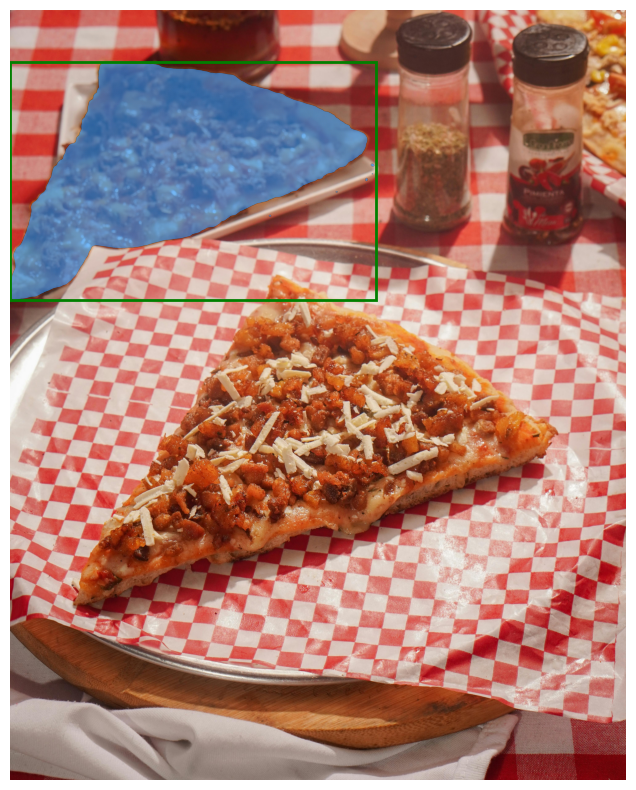

In [40]:
masks,_,_=predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_boxes[None,:],
    multimask_output=False,
)
plt.figure(figsize=(10,10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_boxes, plt.gca())
plt.axis('off')
plt.show()